In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('E:/Projects/creditcardfraud/creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data_copy=data.copy()

In [8]:
X=data.drop('Class',axis=1)
Y=data['Class']

In [9]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [12]:
X_train.shape

(170884, 30)

In [13]:
Y_train.shape

(170884,)

In [14]:
X_test.shape

(113923, 30)

In [15]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
Y_pred.shape

(113923,)

In [17]:
Y_test.shape

(113923,)

In [18]:
accuracy_score(Y_test,Y_pred,normalize=True)

0.9989817683874196

In [19]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from matplotlib import pyplot

In [20]:
# MY ROC:
fpr,tpr,threshold=roc_curve(Y_test,Y_pred)
roc_auc=auc(fpr,tpr)
print(fpr.shape)
print(tpr.shape)
print(threshold)

(3,)
(3,)
[2 1 0]


In [21]:
score=roc_auc
print('accuracy score(AUC):',roc_auc*100,'%')   # EASIER TO USE ROC_AUC_SCORE() FUNC DIRECTLY!

accuracy score(AUC): 77.94204248416527 %


In [22]:
# Random Guessing line (the straight line) : connecting [0,0] and [1,1].
rand_prob=[0 for i in range(len(Y_test))]
rand_auc_score=roc_auc_score(Y_test,rand_prob)
print('random guess line score:',rand_auc_score*100,'%')

rand_fpr,rand_tpr,rand_thres=roc_curve(Y_test,rand_prob)

random guess line score: 50.0 %


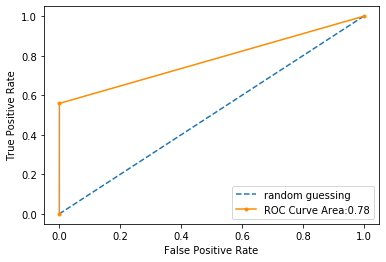

In [23]:
# My PLOT:
# plotting the random guess line:
pyplot.plot(rand_fpr,rand_tpr,linestyle='--',label='random guessing')

####Plotting the ROC curve:
pyplot.plot(fpr, tpr, color='darkorange',marker='.', label='ROC Curve Area:%0.2f'%score)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

Accuracy score on TRAINING SET::

In [24]:
lr_f=lr.predict(X_train)
fun=roc_auc_score(Y_train,lr_f)

In [25]:
fun

0.8250256318061076

In [26]:
accuracy_score(Y_train,lr_f)

0.9990988038669507